# Library Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

**MNIST Data Loading**

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('train_x.shape:', train_x.shape)
print('test_x.shape:', test_x.shape)
print('train_y.shape:', train_y.shape)
print('test_y.shape:', test_y.shape)

train_x.shape: (60000, 28, 28)
test_x.shape: (10000, 28, 28)
train_y.shape: (60000,)
test_y.shape: (10000,)


**Data Confirmation**

id = 6531
This Picture is Number 6.


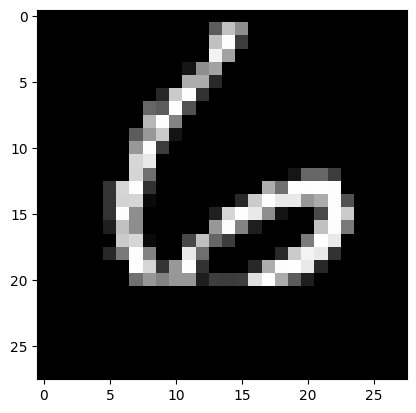

In [4]:
# Ctrl + Enter 로 반복실행

id = rd.randrange(0, len(test_y)+1)

print(f'id = {id}')
print(f'This Picture is Number {test_y[id]}.')
plt.imshow(test_x[id], cmap='gray')
plt.show()

# Reshape for Using Convolution Layer

**Add Channel**

In [5]:
print('train_x.shape:', train_x.shape)
print('test_x.shape:', test_x.shape)

train_x.shape: (60000, 28, 28)
test_x.shape: (10000, 28, 28)


In [6]:
_, h, w = train_x.shape
print(h, w)

28 28


In [7]:
train_x = train_x.reshape(-1, h, w, 1)
test_x = test_x.reshape(-1, h, w, 1)

print('train_x.shape:', train_x.shape)
print('train_y.shape:', train_y.shape)
print('test_x.shape:', test_x.shape)
print('test_y.shape:', test_y.shape)

train_x.shape: (60000, 28, 28, 1)
train_y.shape: (60000,)
test_x.shape: (10000, 28, 28, 1)
test_y.shape: (10000,)


**Scaling**

In [8]:
# MinMaxScaler -> Tabular Data
# Direct Scaling -> Image Data

max_n, min_n = train_x.max(), train_x.min()

train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [9]:
print('max value of train_x:', train_x.max())
print('min value of train_x:', train_x.min())

max value of train_x: 1.0
min value of train_x: 0.0


**One-hot Encoding**

In [10]:
from tensorflow.keras.utils import to_categorical

class_n = len(np.unique(train_y))

train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [11]:
print('train_y.shape:', train_y.shape)
print('test_y.shape:', test_y.shape)

train_y.shape: (60000, 10)
test_y.shape: (10000, 10)


# 모델링

In [12]:
# Library 불러오기
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
## Functional API
# 1. Session Clear : If model structure exist in mem, Delete model structure.
clear_session()

# 2. Weaving Layers : Like Chain.
X = Input(shape=(28, 28, 1))

H = Conv2D(filters=128,           # 새롭게 제작하려는 feature map 수
           kernel_size=(3,3),     # Convolutional Filter의 가로 세로 사이즈
           strides=1,             # Convolutional Filter의 이동 보폭
           padding='same',        # 패딩 적용 유무
           activation='relu'      # 활성화 함수
           )(X)
H = Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same', activation='relu')(H)
H = MaxPool2D(pool_size=(2,2),    # Pooling Filter의 가로세로 크기
              strides=(2,2))(H)   # Pooling Filter의 이동 보폭(None은 기본적으로 pool_size를 따라감)

H = Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu')(H)
H = Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu')(H)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)

H = Flatten()(H)
H = Dense(128, activation='relu')(H)

Y = Dense(10, activation='softmax')(H)

# 3. Appoint model's start and end point.
model = Model(X, Y)

# 4. Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                             

In [14]:
# Early Stopping
early = EarlyStopping(monitor='val_loss',           # EarlyStopping 적용할 관측 대상
                      min_delta=0,                  # Threshold. 설정한 값 이상으로 변화해야 개선되었다 간주.
                      patience=3,                   # 성능 개선이 발생하지 않을 때, 몇 Epochs 더 볼 것인지.
                      verbose=1,
                      restore_best_weights=True     # 가장 성능이 좋게 나온 Epoch의 가중치로 되돌림.
                      )

In [15]:
# Fitting
history = model.fit(train_x, train_y, epochs=100000,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[early])

Epoch 1/100000
1500/1500 [==============================] - 25s 9ms/step - loss: 0.1228 - accuracy: 0.9622 - val_loss: 0.0467 - val_accuracy: 0.9852
Epoch 2/100000
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0406 - accuracy: 0.9876 - val_loss: 0.0407 - val_accuracy: 0.9894
Epoch 3/100000
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0464 - val_accuracy: 0.9862
Epoch 4/100000
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0343 - val_accuracy: 0.9906
Epoch 5/100000
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0169 - accuracy: 0.9947 - val_loss: 0.0530 - val_accuracy: 0.9847
Epoch 6/100000
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.0458 - val_accuracy: 0.9891
Epoch 7/100000
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0117 - accuracy: 0.9961

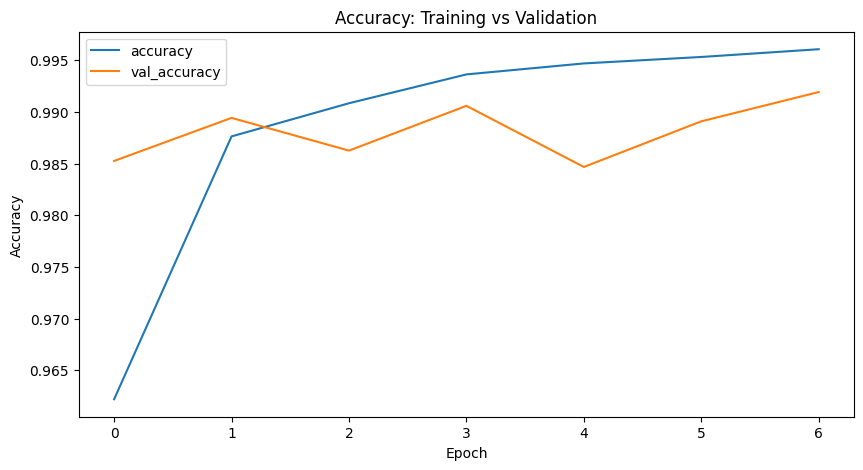

In [16]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(accuracy, label='Training')
plt.plot(val_accuracy, label='Validation')
plt.title('Accuracy: Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

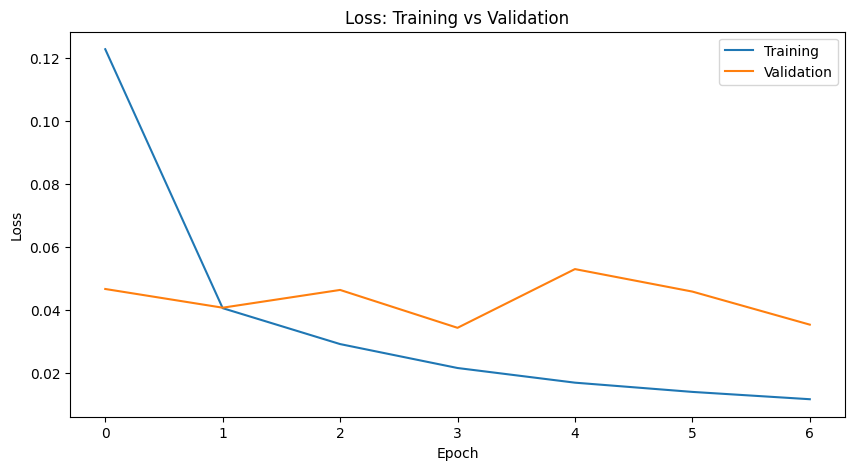

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.plot(loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.title('Loss: Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Generate Predict Value**

In [18]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = np.argmax(pred_train, axis=1)
single_pred_test = np.argmax(pred_test, axis=1)
train_y = np.argmax(train_y, axis=1)
test_y = np.argmax(test_y, axis=1)

train_accuracy = accuracy_score(train_y, single_pred_train)
test_accuracy = accuracy_score(test_y, single_pred_test)

print("CNN")
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

313/313 [==============================] - 1s 4ms/step
CNN
Training Accuracy: 99.52%
Test Accuracy: 99.18%


# Visualize Number Image

id = 4293
Next Image is Number 9.
Model Prediction: 9.
Model's Categorical Value: [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 99.]
Correct!


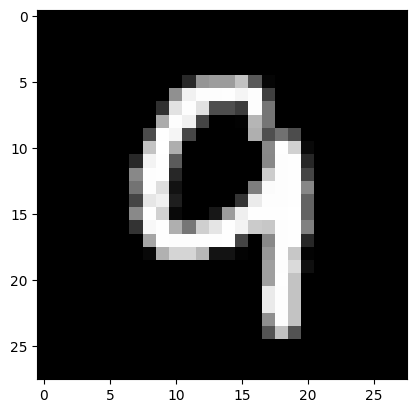

In [26]:
# Ctrl+Enter를 통해 반복 확인

id = rd.randrange(0, len(test_x)+1)

print(f'id = {id}')
print(f'Next Image is Number {test_y[id]}.')
print(f'Model Prediction: {single_pred_test[id]}.')
print(f"Model's Categorical Value: {np.floor(pred_test[id]*100)}")

if test_y[id] == single_pred_test[id]:
  print('Correct!')
else:
  print('Wrong!')

plt.imshow(test_x[id].reshape((28, 28, -1)), cmap='gray')
plt.show()